### 数据归一化

#### 最值归一化 Normalization
公式： X = (X - min(X)) / (max(X) - min(X))

#### 均值方差归一化 Standardization
公式: X = (X - mean(X))/ std(X) 
这样求出的数据均值为0，方差为1(利用统计学求期望与方差公式很容易推出)

In [2]:
import numpy as np
XTest = np.random.randint(0, 100, (50, 2))

In [3]:
XTest = np.array(XTest, dtype=float)

In [5]:
XTest[:10,]

array([[ 0., 64.],
       [37., 87.],
       [97.,  2.],
       [87., 34.],
       [21., 36.],
       [37., 61.],
       [36., 11.],
       [66., 66.],
       [72., 28.],
       [93., 46.]])

In [7]:
XTest[:,0] = (XTest[:,0] - np.mean(XTest[:,0])) / np.std(XTest[:,0])
XTest[:,1] = (XTest[:,1] - np.mean(XTest[:,1])) / np.std(XTest[:,1])

In [8]:
XTest[:10,:]

array([[-1.57274354,  0.71322624],
       [-0.3832196 ,  1.57029017],
       [ 1.54573813, -1.59712   ],
       [ 1.22424517, -0.40468323],
       [-0.89760833, -0.33015593],
       [-0.3832196 ,  0.6014353 ],
       [-0.4153689 , -1.26174716],
       [ 0.54910997,  0.78775354],
       [ 0.74200574, -0.62826512],
       [ 1.41714095,  0.04248056]])

In [9]:
np.mean(XTest[:,0])

-2.886579864025407e-17

In [10]:
np.std(XTest[:,0])

1.0

In [11]:
import matplotlib.pyplot as plt

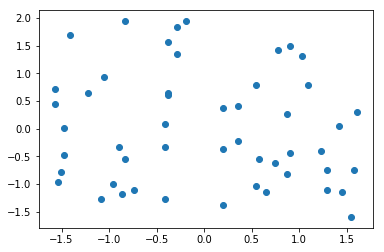

In [12]:
plt.scatter(XTest[:,0], XTest[:, 1])
plt.show()

In [13]:
from sklearn import preprocessing
from sklearn import datasets

In [14]:
iris = datasets.load_iris()

In [15]:
iris_Feature = iris.data
iris_target = iris.target

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
Feature_train, Feature_test, target_train, target_test = train_test_split(iris_Feature, iris_target, test_size=0.2, random_state=666)

In [28]:
stdScaler = preprocessing.StandardScaler()

In [29]:
stdScaler.fit(Feature_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
stdScaler.mean_

array([5.83416667, 3.0825    , 3.70916667, 1.16916667])

In [31]:
stdScaler.scale_

array([0.81019502, 0.44076874, 1.76295187, 0.75429833])

In [32]:
scaler_feature_train = stdScaler.transform(Feature_train)
scaler_feature_test = stdScaler.transform(Feature_test)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
iris_knn_clf = KNeighborsClassifier(n_neighbors=3)

In [35]:
iris_knn_clf.fit(scaler_feature_train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [36]:
iris_knn_clf.score(scaler_feature_test, target_test)

1.0

#### 简单实现StandarScaler

代码在playML文件夹下

In [38]:
from playML.preprocessing import StandardScaler

In [39]:
myStdScl = StandardScaler()

In [40]:
myStdScl.fit(Feature_train)

In [41]:
myStdScl.mean_

array([5.83416667, 3.0825    , 3.70916667, 1.16916667])

In [42]:
scaled_train_feature_data = myStdScl.transform(Feature_train)

In [43]:
scaled_test_feature_data = myStdScl.transform(Feature_test)

In [45]:
iris_knn_clf.fit(scaled_train_feature_data, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [46]:
iris_knn_clf.score(scaled_test_feature_data, target_test)

1.0

In [47]:
iris_knn_clf.score(Feature_test, target_test)

0.3333333333333333